# Exploring the NASA VEDA Platform

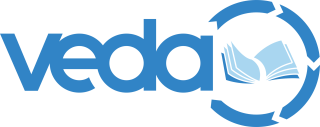


This notebook is divided into three parts, with first part providing a background of the VEDA platform while the other two parts demonstrating the functionalities of the VEDA Data Catalog and EOAPI.

0. VEDA Background
1. Reading and visualizing one of the datasets from the VEDA data catalog.
2. Using the VEDA EOAPI to generate a time-series of the [NASA Orbiting Carbon Observatory-2 (OCO-2)](https://oco.jpl.nasa.gov/) satellite observations using the EOAPI.

Presenter: Dr. Rajat Shinde (NASA IMPACT - UAH), Dr. Manil Maskey (NASA), Dr. Brian Freitag (NASA)

Author: Dr. Rajat Shinde (NASA IMPACT - UAH), Slesa Adhikari (NASA IMPACT - UAH)

#### 1. Visualization, Exploration and Data Analysis (VEDA) Platform Backgound

NASA's Visualization, Exploration, and Data Analysis (VEDA) project is an open-source science cyberinfrastructure for data processing, visualization, exploration, and geographic information systems (GIS) capabilities. 

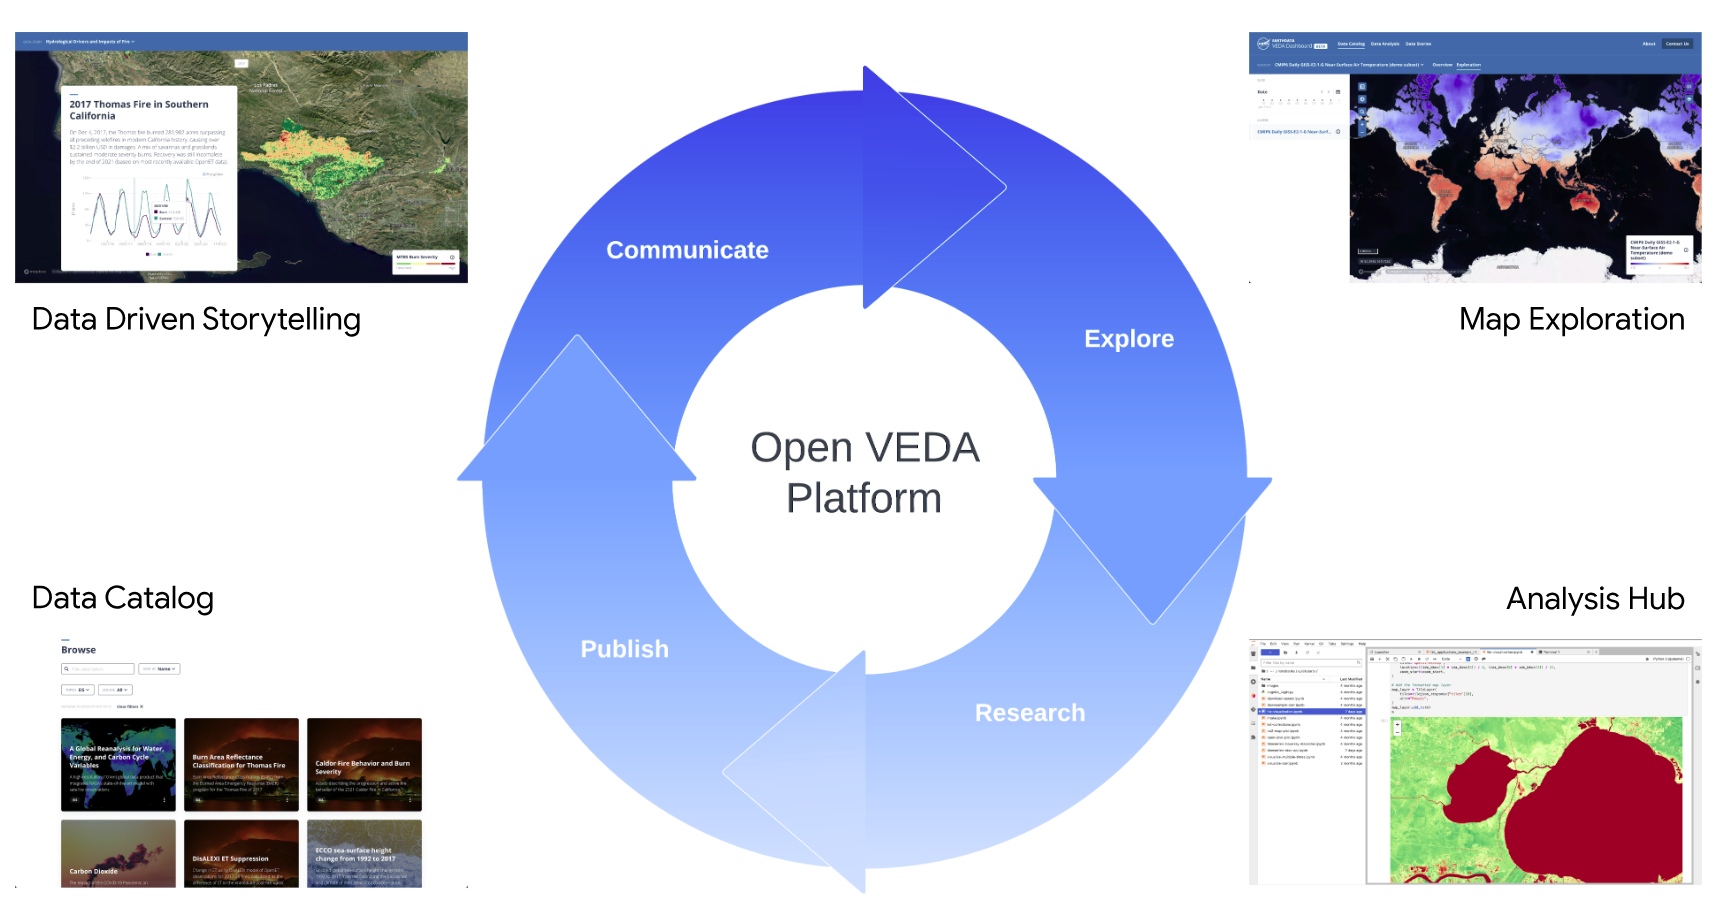

Developed collaboratively and mostly reusing existing open-source components, VEDA consolidates GIS delivery mechanisms, processing platforms, analysis services, and visualization tools and provides an ecosystem of open tools for addressing Earth science research and application needs through the public-facing VEDA Dashboard.

**Overview**

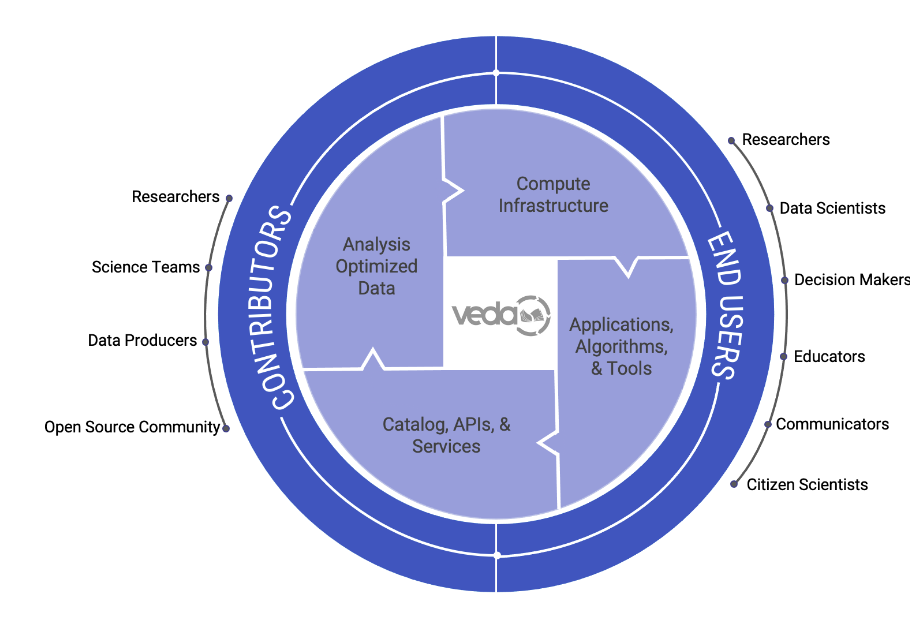

**Data Architecture**

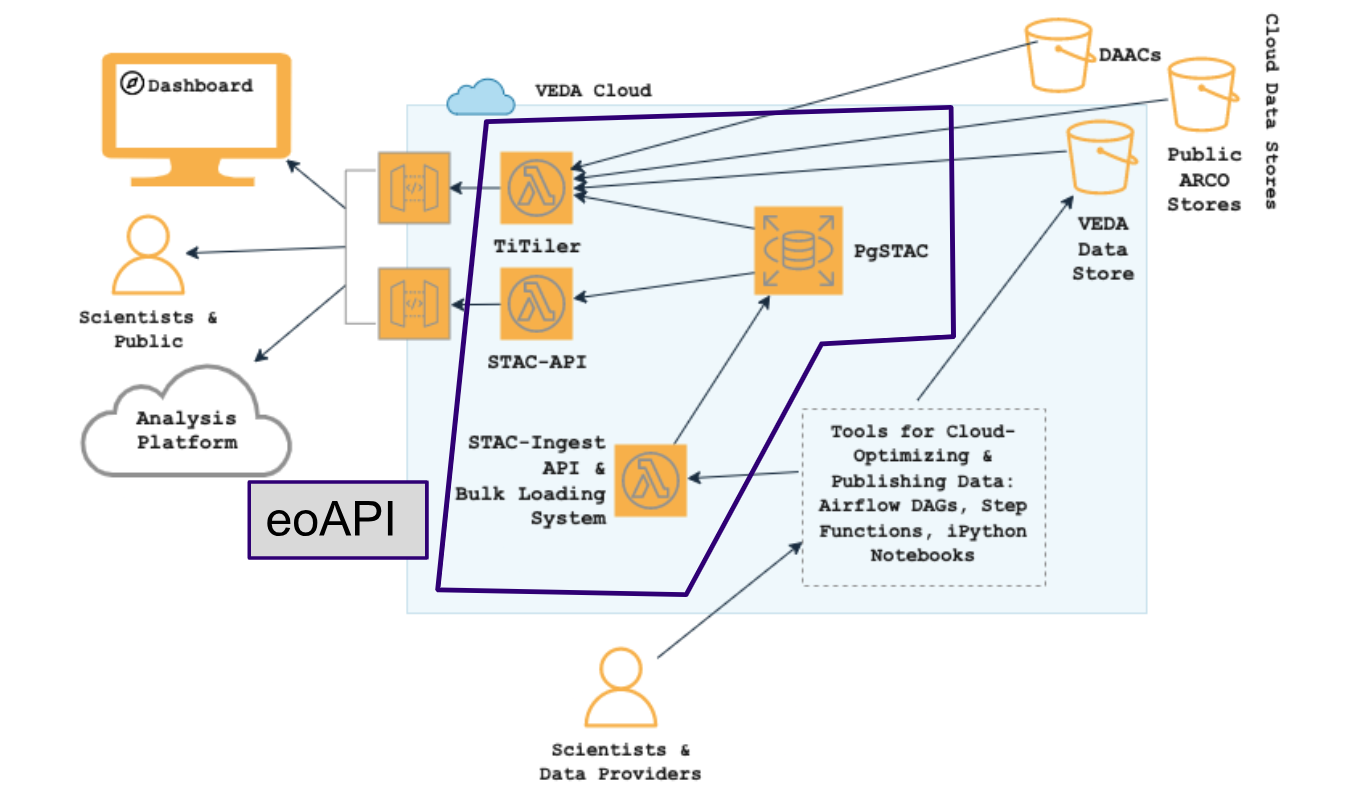

Courtesy: Illustrations from IEEE GRSS Webinar 2024 on [VEDA: An Interoperable Platform for Open Science](https://docs.google.com/presentation/d/e/2PACX-1vSqielYlL-s_emUFeqDlaD7U98vyB2LOTlYYrU7wCIyh7RBQ69fbLYViur5Eq2Klg/pub?start=false&loop=false&delayms=3000&slide=id.g26bc24abf7a_0_72) by Dr. Brian Freitag (NASA MSFC), Slesa Adhikari (NASA IMPACT - UAH).

**More links**
1. [VEDA User Documentation](https://nasa-impact.github.io/veda-docs/)
2. [History of VEDA](https://impactunofficial.medium.com/introducing-veda-an-open-science-platform-to-accelerate-earth-science-research-and-application-2c7339640514)

#### 2. Reading and visualizing one of the datasets from the VEDA data catalog

**Import all the necesssary libraries**

Make sure you install these first using:

```bash
pip install pystac_client folium seaborn pandas
```

In [1]:
# imports
import requests
from pystac_client import Client
import folium
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from dateutil import parser

**Define the API endpoints**

The EOAPI is a combination of two components.
1. Data catalog - the [SpatioTemporal Asset Catalog (STAC)](https://stacspec.org/en/) specification is used to catalog the available datasets
2. Dynamic tile server - [TiTiler](https://developmentseed.org/titiler/) is used to dynamically serve cloud optimized geotiff (raster) data files

In [55]:
STAC_API_URL = "https://openveda.cloud/api/stac/"
RASTER_API_URL = "https://openveda.cloud/api/raster"

Use the `pystac_client` library to interact with the STAC data catalog

In [3]:
catalog = Client.open(STAC_API_URL)

List all the datasets (collections) in the catalog

In [4]:
for collection in list(catalog.get_collections()):
    print(f"{collection.id} - {collection.title}")

no2-monthly-diff - NO₂ (Diff)
climdex-tmaxxf-access-cm2-ssp126 - CLIMDEX ACCESS CM2 SSP125 tmaxXF
snow-projections-diff-245 - Projections of Snow Water Equivalent (SWE) Losses - SSP2-4.5
bangladesh-landcover-2001-2020 - Annual land cover maps for 2001 and 2020
CMIP245-winter-median-pr - Projected changes to winter (January, February, and March) cumulative daily precipitation
social-vulnerability-index-socioeconomic-nopop - Social Vulnerability Index (SocioEconomic) (Masked)
grdi-v1-raster - GRDI V1 raster
CMIP245-winter-median-ta - Projected changes to winter (January, February, and March) average daily air temperature
barc-thomasfire - Burn Area Reflectance Classification for Thomas Fire
climdex-tmaxxf-access-cm2-ssp370 - CLIMDEX ACCESS CM2 SSP370 tmaxXF
MO_NPP_npp_vgpm - 
EPA-monthly-emissions_4B_Manure_Management - Gridded 2012 EPA Methane Emissions - Manure Management (monthly)
landsat-c2l2-sr-antarctic-glaciers-thwaites - Selected Landsat 7 through 9 Surface Reflectance Scenes for

Choose a collection to work with

Search all the items in the collection

In [29]:
collection_id = "co2-mean"
search = catalog.search(collections=[collection_id])
items = list(search.items())
items

[<Item id=xco2_16day_mean._2022-02-13>,
 <Item id=xco2_16day_mean._2022-02-12>,
 <Item id=xco2_16day_mean._2022-02-11>,
 <Item id=xco2_16day_mean._2022-02-10>,
 <Item id=xco2_16day_mean._2022-02-09>,
 <Item id=xco2_16day_mean._2022-02-08>,
 <Item id=xco2_16day_mean._2022-02-07>,
 <Item id=xco2_16day_mean._2022-02-06>,
 <Item id=xco2_16day_mean._2022-02-05>,
 <Item id=xco2_16day_mean._2022-02-04>,
 <Item id=xco2_16day_mean._2022-02-03>,
 <Item id=xco2_16day_mean._2022-02-02>,
 <Item id=xco2_16day_mean._2022-02-01>,
 <Item id=xco2_16day_mean._2022-01-31>,
 <Item id=xco2_16day_mean._2022-01-30>,
 <Item id=xco2_16day_mean._2022-01-29>,
 <Item id=xco2_16day_mean._2022-01-28>,
 <Item id=xco2_16day_mean._2022-01-27>,
 <Item id=xco2_16day_mean._2022-01-26>,
 <Item id=xco2_16day_mean._2022-01-25>,
 <Item id=xco2_16day_mean._2022-01-24>,
 <Item id=xco2_16day_mean._2022-01-23>,
 <Item id=xco2_16day_mean._2022-01-22>,
 <Item id=xco2_16day_mean._2022-01-21>,
 <Item id=xco2_16day_mean._2022-01-20>,


Load and inspect one of the items

In [30]:
s3_uri = items[0].assets["cog_default"].href

In [37]:
stats = requests.get(
    f"{RASTER_API_URL}/cog/statistics",
    params={"url": s3_uri}
).json()
stats

{'b1': {'min': 0.00041189576950273477,
  'max': 0.00042313208723498974,
  'mean': 0.00041630993491034506,
  'count': 207936.0,
  'sum': 86.56582262551751,
  'std': 2.8833167360809235e-06,
  'median': 0.00041691531896503875,
  'majority': 0.0004122076131807262,
  'minority': 0.00041189576950273477,
  'unique': 205969.0,
  'histogram': [[41152.0,
    30026.0,
    16592.0,
    10246.0,
    15879.0,
    30990.0,
    35061.0,
    27522.0,
    414.0,
    54.0],
   [0.00041189576950273477,
    0.00041301940127596025,
    0.00041414303304918574,
    0.0004152666648224113,
    0.00041639029659563677,
    0.00041751392836886225,
    0.00041863756014208774,
    0.0004197611919153132,
    0.00042088482368853877,
    0.00042200845546176425,
    0.00042313208723498974]],
  'valid_percent': 100.0,
  'masked_pixels': 0.0,
  'valid_pixels': 207936.0,
  'percentile_2': 0.0004121527795177826,
  'percentile_98': 0.0004204202202799934}}

**Display the COG in a map**

- Get the tiles endpoint for the file

In [38]:
rescale = f"{stats['b1']['min']},{stats['b1']['max']}"

In [39]:
tiles = requests.get(
    f"{RASTER_API_URL}/stac/tilejson.json?collection={collection_id}&item={items[0].id}&assets=cog_default&colormap_name=rdbu_r&rescale={rescale}"
).json()

In [40]:
tiles

{'tilejson': '2.2.0',
 'version': '1.0.0',
 'scheme': 'xyz',
 'tiles': ['https://openveda.cloud/api/raster/stac/tiles/WebMercatorQuad/{z}/{x}/{y}@1x?collection=co2-mean&item=xco2_16day_mean._2022-02-13&assets=cog_default&colormap_name=rdbu_r&rescale=0.00041189576950273477%2C0.00042313208723498974'],
 'minzoom': 0,
 'maxzoom': 24,
 'bounds': [-180.3125, -90.25, 179.6875, 90.25],
 'center': [-0.3125, 0.0, 0]}

- Use the tiles to visualize the file in a map

In [41]:
m = folium.Map(
    zoom_start=6,
    scroll_wheel_zoom=True, 
    tiles=tiles["tiles"][0], 
    attr="VEDA", 
    minzoom=0, 
    maxzoom=18,
)

In [42]:
m

#### 3. Using the EOAPI to generate a time-series of daily Mean CO₂ Values

For today's story, we will plot daily CO<sub>2</sub> values for India, China, U.S., and the European Union for a given year and month from the [NASA Orbiting Carbon Observatory-2 (OCO-2)](https://oco.jpl.nasa.gov/) satellite observations using the EOAPI.

In [50]:
# Here, we find the relevant collection ID for the dataset
collections = {
    "co2": "co2-mean",
}

Define the roughly similar Area of Interest (AOI) for some of the regions used in the story.

In [180]:
aois = {
    "europe": {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "Polygon",
        "coordinates": [
          [
            [-9.5, 35.5],
            [28.5, 35.5],
            [28.5, 70],
            [-9.5, 70],
            [-9.5, 35.5]
          ]
        ]
      }
    },
    "india": {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "coordinates": [
          [
            [
              84.44227371801799,
              25.276852788244952
            ],
            [
              81.73331688510166,
              25.379576397063317
            ],
            [
              81.40290450746915,
              20.640781701865322
            ],
            [
              84.09079123546121,
              20.59296261766137
            ],
            [
              84.44227371801799,
              25.276852788244952
            ]
          ]
        ],
        "type": "Polygon"
      }
    },
    "china": {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "coordinates": [
          [
            [
              118.14487188674968,
              40.38237805885373
            ],
            [
              112.59679754686567,
              40.39197699341523
            ],
            [
              112.78712023622006,
              32.015052150835814
            ],
            [
              117.937454307721,
              32.102440507249895
            ],
            [
              118.14487188674968,
              40.38237805885373
            ]
          ]
        ],
        "type": "Polygon"
      }
    },
    "usa": {
        "type": "Feature",
        "properties": {},
        "geometry": {
            "coordinates": [
            [
                [
                -80.16702521343733,
                41.73420113945659
                ],
                [
                -83.56446680395005,
                38.599369254919566
                ],
                [
                -82.00280661075571,
                37.54658260550103
                ],
                [
                -78.28140359718638,
                40.450899619800595
                ],
                [
                -80.16702521343733,
                41.73420113945659
                ]
            ]
            ],
            "type": "Polygon"
        }
    },
}

Define a function that takes the following params:
  1. `item`: a STAC item
  2. `geojson`: the geojson of the AOI

Using the `/cog/statistics/` endpoint of the raster API, we get back the statistics of the `item` (which corresponds to one COG file) within the given `geojson` AOI.

The statistics includes `min`, `max`, `mean`, `std`, etc.

Let's start out with the US 🇺🇸 !

We'll get all the items in the CO2 collection and generate the statistics from them for the United States.

In [182]:
# Function to generate statistics from the API for a single item
def generate_stats(item, geojson):
    result = requests.post(
        f"{RASTER_API_URL}/cog/statistics", 
        params={
            "url": item.assets["cog_default"].href
        },
        json=geojson
    ).json()
    return {
        **result["properties"],
        "start_datetime": str(item.properties.get("datetime", item.properties.get("start_datetime")))[:10],  # YYYY-MM-DD format
        "collection": item.collection_id
    }

# Function to filter items by the specified year and month
def filter_items_by_month(collection, year, month):
    filtered_items = []
    for item in collection:
        date_str = item.properties.get("datetime", item.properties.get("start_datetime"))
        date = parser.parse(date_str)
        if date.year == year and date.month == month:
            filtered_items.append(item)
    return filtered_items

# Function to fetch daily statistics for the filtered items
def fetch_daily_stats(filtered_items, geojson):
    daily_stats = []
    for item in filtered_items:
        try:
            stats = generate_stats(item, geojson)
            daily_stats.append(stats)
        except Exception as e:
            print(f"Error processing item {item}: {e}")
    return daily_stats


In [183]:
usa_aoi = aois["usa"]
items = list(catalog.search(collections=[collections["co2"]]).items())

# Specify the year and month for the analysis
year = 2020
month = 4  # April

# Filter items for the specified month and year
filtered_items = filter_items_by_month(items, year, month)

# Fetch daily statistics for the filtered items
daily_stats = fetch_daily_stats(filtered_items, usa_aoi)
# print(daily_stats)

Create a function that takes the statistics (which is a json) and converts it to a pandas dataframe in a format that'll make it easy to read and visualize.

We're only concerned with the `mean` statistics for this example.

In [184]:
def clean_daily_stats(daily_stats) -> pd.DataFrame:
    # Convert the daily_stats JSON to a pandas DataFrame
    df = pd.json_normalize(daily_stats)
    
    # Simple renaming for readability
    df.columns = [col.replace("statistics.b1.", "") for col in df.columns]
    
    # Create a date column from the start_datetime column
    df["date"] = pd.to_datetime(df["start_datetime"], format="mixed")
    
    # Sort the DataFrame by the date column
    df = df.sort_values(by=["date"])

    return df

In [185]:
cleaned_df = clean_daily_stats(daily_stats)

We'll now create a time-series of the mean values for $CO_2$ for the area in the US.

In [194]:
def plot_time_series(cleaned_df, year):
    sns.set_style("darkgrid")
    
    # Filter cleaned_df for the specified year
    df_year = cleaned_df[cleaned_df["date"].dt.year == year]
    
    ax = sns.lineplot(
        x="date",
        y="mean",
        hue="collection",
        data=df_year,
        palette=["#2196f3", "#ff5722"],
        style="collection",
        markers=["*", "d"]
    )
    ax.set_title(f"Daily $CO_2$ Levels for Year {year}")
    ax.set_xlabel("Date")
    ax.set_ylabel("$CO_2$ Levels")

    # Format the x-axis to show dates properly
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Show every day
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))  # Format as YYYY-MM-DD
    plt.xticks(rotation=45)  # Rotate dates for better readability

    plt.legend(frameon=False, ncol=3)
    plt.tight_layout()  # Adjust layout to make room for rotated labels
    plt.show()

/tmp/ipykernel_411/607822701.py:7: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  ax = sns.lineplot(
/tmp/ipykernel_411/607822701.py:7: UserWarning: The markers list has more values (2) than needed (1), which may not be intended.
  ax = sns.lineplot(


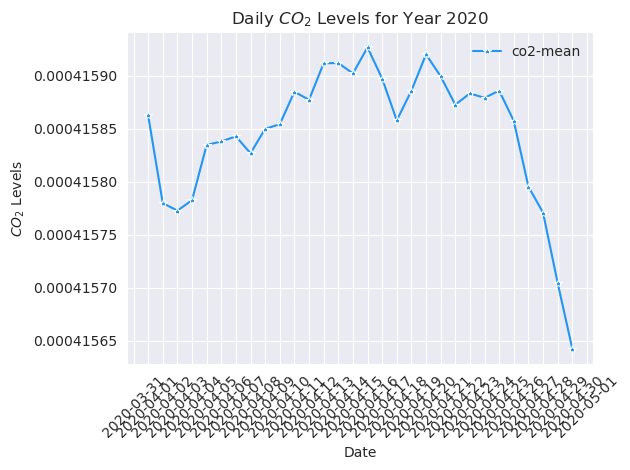

In [195]:
plot_time_series(cleaned_df, year)

In [196]:
def create_chart(country, year, month):
    filtered_items = filter_items_by_month(items, year, month)
    # Fetch daily statistics for the filtered items
    daily_stats = fetch_daily_stats(filtered_items, aois[country])
    cleaned_df = clean_daily_stats(daily_stats)

    sns.set_style("darkgrid")
    
    # Filter cleaned_df for the specified year
    df_year = cleaned_df[cleaned_df["date"].dt.year == year]
    
    ax = sns.lineplot(
        x="date",
        y="mean",
        hue="collection",
        data=df_year,
        palette=["#2196f3", "#ff5722"],
        style="collection",
        markers=["*", "d"]
    )
    ax.set_title(f"Daily $CO_2$ Levels for Year {year}")
    ax.set_xlabel("Date")
    ax.set_ylabel("$CO_2$ Levels")

    # Format the x-axis to show dates properly
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Show every day
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))  # Format as YYYY-MM-DD
    plt.xticks(rotation=45)  # Rotate dates for better readability

    plt.legend(frameon=False, ncol=3)
    plt.tight_layout()  # Adjust layout to make room for rotated labels
    plt.show()


We can use this function to create charts for the rest of the AOIs.

India 🇮🇳

/tmp/ipykernel_411/3154205478.py:12: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  ax = sns.lineplot(
/tmp/ipykernel_411/3154205478.py:12: UserWarning: The markers list has more values (2) than needed (1), which may not be intended.
  ax = sns.lineplot(


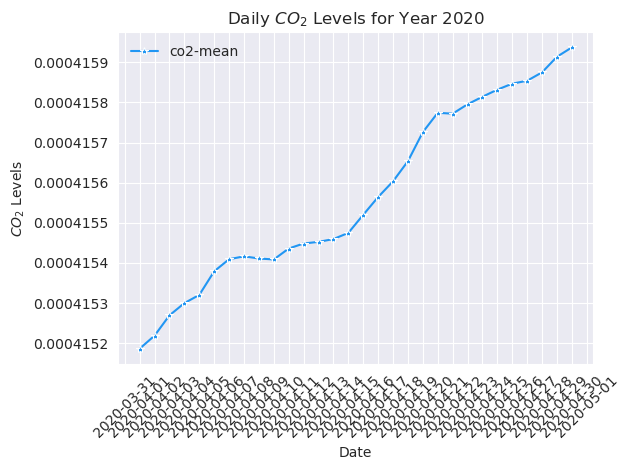

In [197]:
create_chart("india", 2020, 4)

China 🇨🇳

/tmp/ipykernel_411/3154205478.py:12: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  ax = sns.lineplot(
/tmp/ipykernel_411/3154205478.py:12: UserWarning: The markers list has more values (2) than needed (1), which may not be intended.
  ax = sns.lineplot(


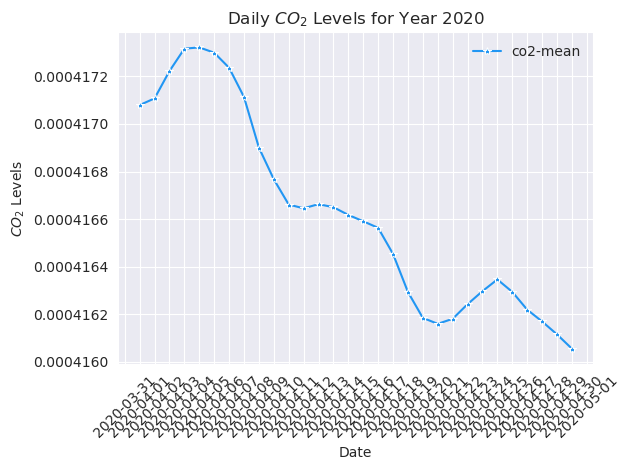

In [198]:
create_chart("china", 2020, 4)

Europe 🇪🇺

In [200]:
# Generate a chart for Europe